# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import pprint as pp
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total = len(cities)
print(f'total cities: {total}')

total cities: 606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

# lists to construct dataframe
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# elements of query
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'appid': weather_api_key,
    'units': 'imperial'
}

# set count value to track number of records processed
count = 1

print(f'Beginning data retrieval')
print(f'------------------------------------------')

# iterate over list of cities
for city in cities:
    
    # set search city for API
    params['q'] = city
    
    # API call to openweathermap.org
    response = requests.get(url, params=params).json()
    
    # populate lists with API data for each city
    try:
        city_name.append(response['name'])
        print(f'Processing record {count} of {total} | {city}')
        try:
            lat.append(response.get('coord').get('lat'))
            lng.append(response.get('coord').get('lon'))
            max_temp.append(response.get('main').get('temp_max'))
            humidity.append(response.get('main').get('humidity'))
            cloudiness.append(response.get('clouds').get('all'))
            wind_speed.append(response.get('wind').get('speed'))
            country.append(response.get('sys').get('country'))
            date.append(response.get('dt'))
        except:
            print(Exception)
    except(KeyError):
        print('Missing city. Skipping....')
    
    # increment count of records being processed
    count += 1

# create dictionary from populated lists
dict = {
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

# convert dictionary to dataframe
cities_df = pd.DataFrame(dict)

Beginning data retrieval
------------------------------------------
Processing record 1 of 606 | east london
Processing record 2 of 606 | blackwater
Missing city. Skipping....
Processing record 4 of 606 | hithadhoo
Processing record 5 of 606 | butaritari
Processing record 6 of 606 | ridgecrest
Processing record 7 of 606 | copiapo
Processing record 8 of 606 | hilo
Processing record 9 of 606 | chuy
Processing record 10 of 606 | carnarvon
Processing record 11 of 606 | rikitea
Processing record 12 of 606 | matagami
Missing city. Skipping....
Processing record 14 of 606 | qaanaaq
Missing city. Skipping....
Processing record 16 of 606 | jamestown
Processing record 17 of 606 | hasaki
Processing record 18 of 606 | kilindoni
Processing record 19 of 606 | boda
Processing record 20 of 606 | yellowknife
Processing record 21 of 606 | albany
Processing record 22 of 606 | cognac
Processing record 23 of 606 | port macquarie
Processing record 24 of 606 | brae
Processing record 25 of 606 | bredasdorp
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# display dataframe
cities_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
549,Katobu,-4.9408,122.5276,89.76,57,60,4.97,ID,1666410198
550,Cockburn Town,21.4612,-71.1419,82.90,75,28,17.63,TC,1666410198
551,Santa Rosa,14.3122,121.1114,92.08,67,97,4.74,PH,1666410198
552,Xining,36.6167,101.7667,50.27,48,99,1.41,CN,1666410199
553,Jacareacanga,-6.2222,-57.7528,76.32,83,80,1.19,BR,1666410199


In [8]:
# describe numeric data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.125118,18.582711,60.356715,73.474729,60.916968,7.543484,1.666410e+09
std,33.712671,90.692105,19.274429,19.873840,39.569660,5.604220,7.588847e+01
min,-54.800000,-175.200000,-1.430000,9.000000,0.000000,0.000000,1.666410e+09
25%,-7.417875,-61.636450,46.260000,64.000000,20.000000,3.440000,1.666410e+09
50%,24.900000,20.132700,63.050000,78.000000,75.000000,6.185000,1.666410e+09
75%,49.997425,100.427350,75.870000,88.000000,100.000000,10.077500,1.666410e+09
max,78.218600,179.316700,104.950000,100.000000,100.000000,43.730000,1.666410e+09


In [9]:
# save city data to csv
cities_df.to_csv('output_data/cities_weather.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# filter for cities with humidity greater than zero and save to a dataframe
humidity_error_df = cities_df.loc[cities_df['Humidity'] > 100]
print(f'Number of cities with humidity value higher than 100%: {len(humidity_error_df)}')

Number of cities with humidity value higher than 100%: 0


In [11]:
#  Get the indices of cities that have humidity over 100%.
h_err_index = humidity_error_df.index.to_list()
h_err_index


[]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = cities_df.loc[set(cities_df.index) - set(h_err_index)]
clean_city_data.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
549,Katobu,-4.9408,122.5276,89.76,57,60,4.97,ID,1666410198
550,Cockburn Town,21.4612,-71.1419,82.90,75,28,17.63,TC,1666410198
551,Santa Rosa,14.3122,121.1114,92.08,67,97,4.74,PH,1666410198
552,Xining,36.6167,101.7667,50.27,48,99,1.41,CN,1666410199
553,Jacareacanga,-6.2222,-57.7528,76.32,83,80,1.19,BR,1666410199


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

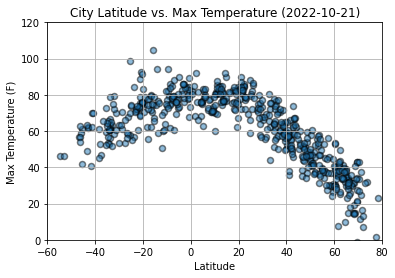

In [13]:
# x and y values
latitude = clean_city_data['Lat']
m_temp = clean_city_data['Max Temp']

# convert unix date value to yyyy-mm-dd
dt_converted = datetime.date.fromtimestamp(max(cities_df['Date']))

# scatter plot paramters
plt.scatter(latitude,m_temp,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(m_temp)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Max Temperature ({dt_converted})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# save figure as png
plt.savefig('output_data/lat_max_temp.png')
plt.show()


## Latitude vs. Humidity Plot

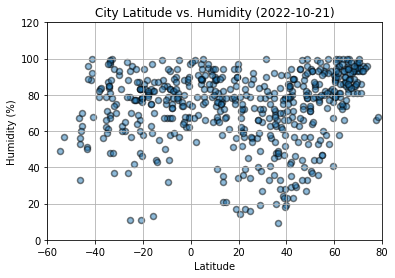

In [14]:
# y values
h_data = clean_city_data['Humidity']

# scatter plot parameters
plt.scatter(latitude,h_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(h_data)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Humidity ({dt_converted})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# save figure to png
plt.savefig('output_data/lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

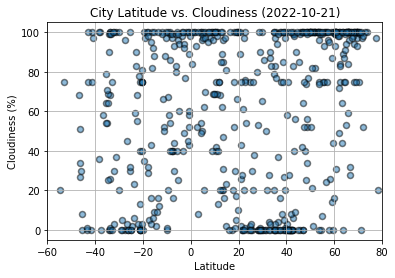

In [15]:
# y values
c_data = clean_city_data['Cloudiness']

# scatter plot parameters
plt.scatter(latitude,c_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(-5,105)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Cloudiness ({dt_converted})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# save figure to plt
plt.savefig('output_data/lat_clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

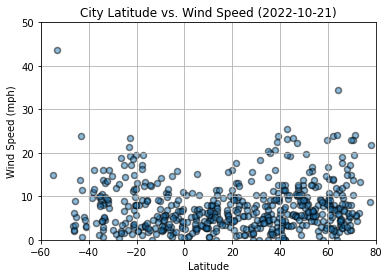

In [16]:
# y values
w_data = clean_city_data['Wind Speed']

# scatter plot parameters
plt.scatter(latitude,w_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(w_data)+5)/10)*10)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Wind Speed ({dt_converted})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# save figure as png
plt.savefig('output_data/lat_wind.png')
plt.show()

## Linear Regression

In [25]:
# subset data for Northern Hemisphere
north_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]
print(f'Northern Hemisphere cities: {len(north_df)}')
north_df.describe()

Northern Hemisphere cities: 383


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,3.830000e+02
mean,39.964821,14.037147,55.906501,73.331593,63.691906,7.498695,1.666410e+09
std,20.331173,86.100235,20.336093,20.953132,40.047408,5.442130,7.378774e+01
min,0.383300,-173.300000,-1.430000,9.000000,0.000000,0.000000,1.666410e+09
25%,22.296850,-66.969150,38.320000,63.500000,20.000000,3.690000,1.666410e+09
50%,41.283500,18.944900,57.200000,79.000000,82.000000,6.130000,1.666410e+09
75%,57.795000,89.093450,74.655000,89.000000,100.000000,9.845000,1.666410e+09
max,78.218600,179.316700,92.080000,100.000000,100.000000,34.520000,1.666410e+09


In [24]:
# subset data for Northern Hemisphere
south_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
print(f'Southern Hemisphere cities: {len(south_df)}')
south_df.describe()

Southern Hemisphere cities: 171


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,-21.071412,28.763712,70.324152,73.795322,54.701754,7.643801,1.666410e+09
std,13.326947,99.733678,11.603482,17.266397,37.858855,5.966635,7.965945e+01
min,-54.800000,-175.200000,40.770000,11.000000,0.000000,0.000000,1.666410e+09
25%,-32.755850,-58.289050,61.340000,64.000000,18.000000,3.065000,1.666410e+09
50%,-20.342800,24.731400,72.250000,78.000000,58.000000,6.260000,1.666410e+09
75%,-9.179950,129.141650,78.115000,85.000000,96.000000,10.885000,1.666410e+09
max,-0.130300,174.500000,104.950000,100.000000,100.000000,43.730000,1.666410e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8951004717395472


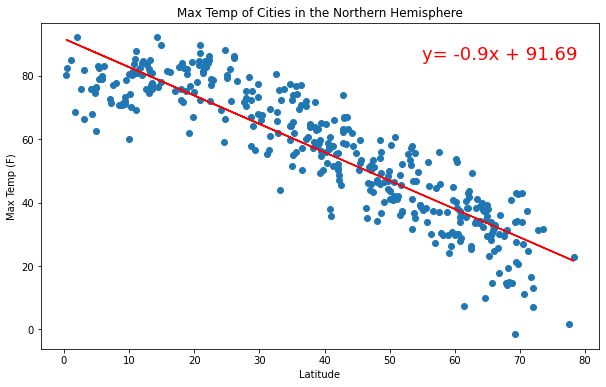

In [49]:
# x and y values
x = north_df['Lat']
y = north_df['Max Temp']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,85),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in the Northern Hemisphere')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6575970714453244


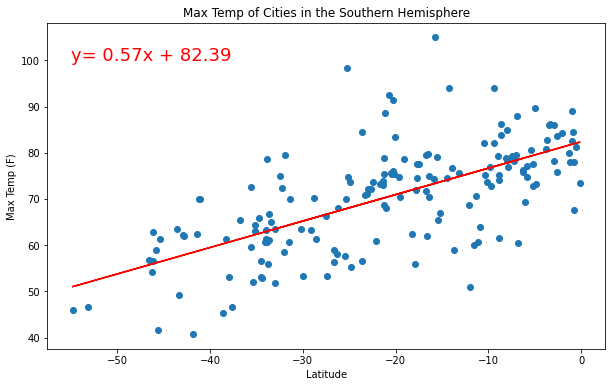

In [50]:
# x and y values
x = south_df['Lat']
y = south_df['Max Temp']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,100),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21448469500795186


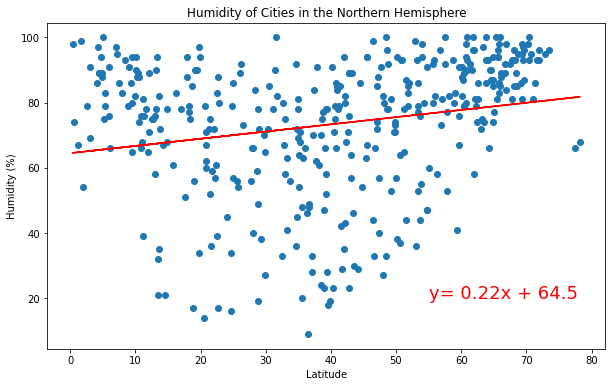

In [55]:
# x and y values
x = north_df['Lat']
y = north_df['Humidity']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1101655898713406


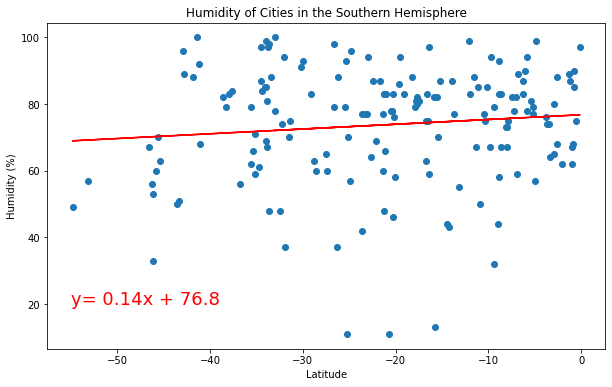

In [57]:
# x and y values
x = south_df['Lat']
y = south_df['Humidity']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21643465206182888


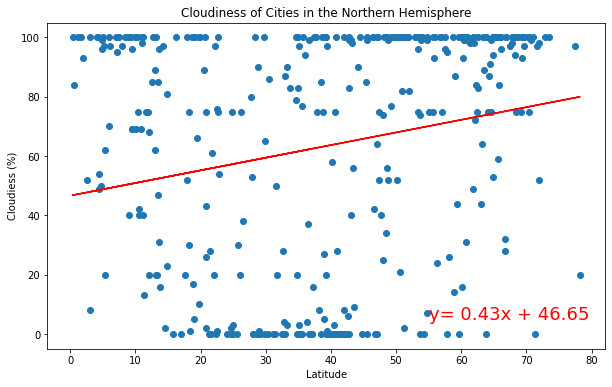

In [59]:
# x and y values
x = north_df['Lat']
y = north_df['Cloudiness']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(55,5),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiess (%)')
plt.title('Cloudiness of Cities in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21697336013438318


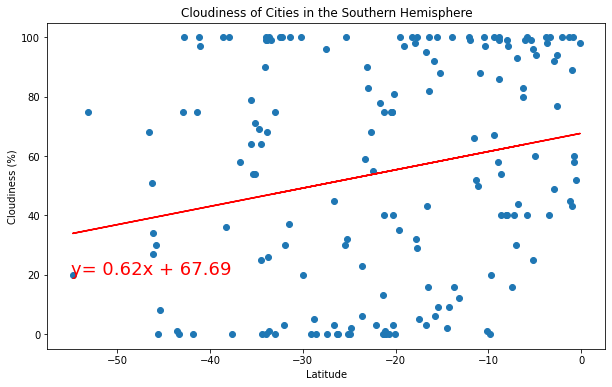

In [60]:
# x and y values
x = south_df['Lat']
y = south_df['Cloudiness']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-55,20),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Cities in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.23343781340684605


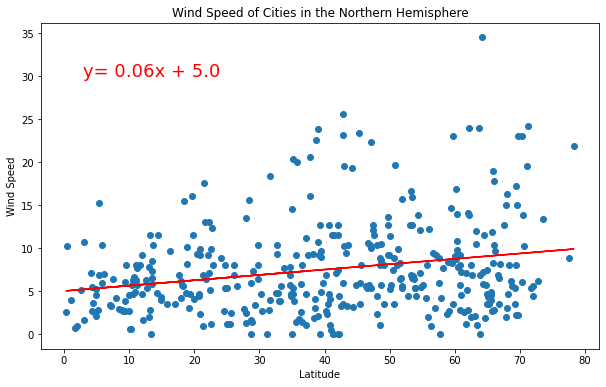

In [63]:
# x and y values
x = north_df['Lat']
y = north_df['Wind Speed']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model
line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(3,30),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed of Cities in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22709388137541556


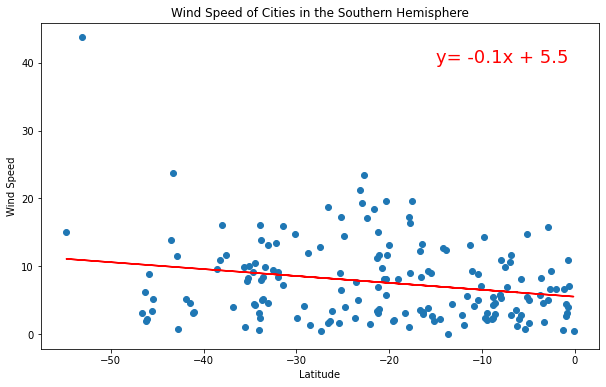

In [65]:
# x and y values
x = south_df['Lat']
y = south_df['Wind Speed']

# r-value
r=st.pearsonr(x,y)[0],2
print(f'The r-value is: {r[0]}')

# linear regression model

line = st.linregress(x,y)

y_values = x*line[0]+line[1]
line_eq = f'y= {str(round(line[0],2))}x + {str(round(line[1],2))}'
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_values,color='red')
plt.annotate(line_eq,(-15,40),fontsize=18,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed of Cities in the Southern Hemisphere')
plt.show()